Create conda env:
```shell
mamba create -n nb -y numba jax matplotlib scipy pandas pyyaml metpy openpyxl xlrd ipykernel jupyterlab
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from metpy.interpolate import interpolate_to_points

### Load the data

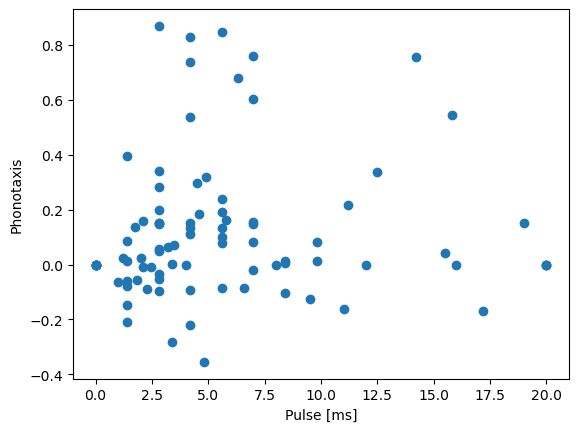

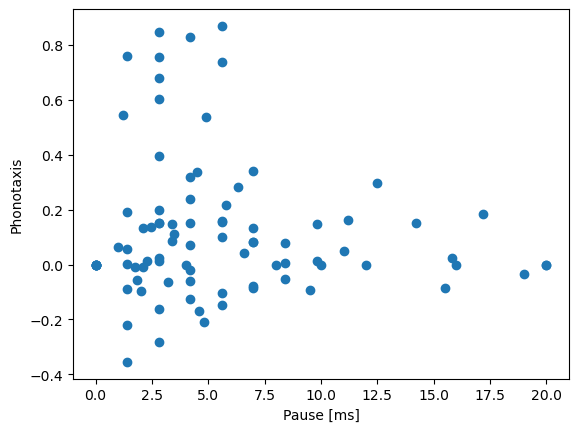

In [2]:
df = pd.read_excel('dat/anuro_ppf.xls', sheet_name='PPF_margins', usecols='A:J')

pdur = df['PDUR'].values
ppau = df['PPAU'].values
phonotaxis = df['rXY'].values

# plot hust for completeness
plt.plot(pdur, phonotaxis, 'o')
plt.xlabel('Pulse [ms]')
plt.ylabel('Phonotaxis')
plt.show()

plt.plot(ppau, phonotaxis, 'o')
plt.xlabel('Pause [ms]')
plt.ylabel('Phonotaxis')
plt.show()


In [3]:
print(phonotaxis)

[ 0.05764057 -0.22068729  0.19168671  0.76166886  0.39706829  0.19955543
  0.151636    0.84708014  0.60469913 -0.05855638 -0.08677825  0.82844225
  0.23782    -0.01995025 -0.1460245  -0.01056962  0.73794043  0.09970129
  0.15425771 -0.07928214  0.34242414  0.13147014  0.15178271  0.08026771
  0.86986357  0.15939533  0.069537    0.11291767  0.134861    0.28124283
  0.53949567  0.31964717  0.68075883  0.01136067 -0.103042    0.00525833
  0.01223067  0.07911    -0.05371667  0.080441    0.14895267  0.0223574
 -0.09771     0.0855798   0.0011184  -0.3551428  -0.2092958  -0.2822802
  0.1468394   0.757393    0.33894275  0.296353    0.151061    0.04939067
 -0.16315233  0.162835    0.2167      0.182598   -0.17058467  0.02251533
  0.54359133 -0.03604225  0.15011975 -0.05672075  0.01281075 -0.0880225
 -0.08575575  0.04210475 -0.09419033 -0.12675567 -0.065186    0.06321567
  0.135911   -0.009908    0.          0.          0.          0.
  0.          0.          0.          0.          0.          

### Make pulse-pause field

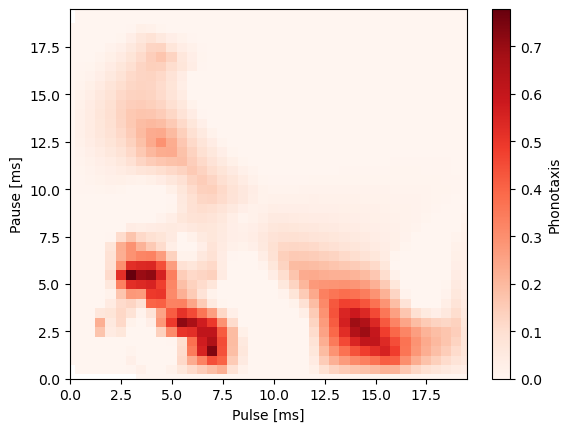

In [8]:
dur_max = 20  # ms
dur_step = 0.5  # ms

# need to jitter data points slightly for interp to work - probably a bug in metpy
points = np.array([pdur + np.random.randn(*pdur.shape)/100, ppau + np.random.randn(*ppau.shape)/100]).T

# make new grid of points to interpolate to
pdur_i0 = ppau_i0 = np.arange(0, dur_max, dur_step)
pdur_i, ppau_i = np.meshgrid(pdur_i0, ppau_i0)
new_points = np.array([pdur_i, ppau_i]).T.reshape((-1, 2))

# natural neighbour interpolation 
ppf = interpolate_to_points(points, phonotaxis, new_points, interp_type='natural_neighbor')
ppf = np.maximum(ppf, 0)  # set neg vals to 0
ppf = ppf.reshape((len(pdur_i), len(ppau_i))).T  # make interpolated ppf square

# print(np.any(np.isnan(ppf)))
# print(np.sum(np.isnan(ppf)))
# print(ppf)

plt.pcolor(pdur_i, ppau_i, ppf, cmap='Reds')
plt.xlim(0, np.max(pdur_i))
plt.ylim(0, np.max(ppau_i))
plt.colorbar(label='Phonotaxis')
plt.xlabel('Pulse [ms]')
plt.ylabel('Pause [ms]')
plt.show()